### 1. Carregar o CSV:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("estoque.csv")

df

,Data_Atualizacao,Produto,Categoria,Quantidade,Preco_Unitario
0,29/03/2023,Monitor,Eletrônicos,97,398.63
1,30/08/2023,Desodorante,Higiene,45,272.30
2,07/12/2023,Arroz,Alimentos,34,487.97
3,15/07/2023,Sabão em Pó,Limpeza,181,419.03
4,14/08/2023,Notebook,Eletrônicos,87,458.93
...,...,...,...,...,...
595,22/07/2023,Teclado,Eletrônicos,30,373.67
596,04/07/2023,Detergente,Limpeza,145,245.53
597,26/07/2023,Sabão em Pó,Limpeza,97,456.52
598,21/12/2023,Esponja,Limpeza,39,242.94


### 2. Calcular o valor total por produto

In [8]:
# Crie uma nova coluna chamada Valor_Estoque, que representa o valor total do produto em estoque (Quantidade * Preco_Unitario).
df['Valor_Estoque'] = df['Quantidade'] * df['Preco_Unitario']
print(df)

# Agrupe os dados por Produto e calcule o valor total de estoque para cada um.
agrupamento = df.groupby('Produto')['Valor_Estoque'].sum().reset_index() # Sem o reset_index, não aparece indice
print(agrupamento)

    Data_Atualizacao      Produto    Categoria  Quantidade  Preco_Unitario  \
0         29/03/2023      Monitor  Eletrônicos          97          398.63   
1         30/08/2023  Desodorante      Higiene          45          272.30   
2         07/12/2023        Arroz    Alimentos          34          487.97   
3         15/07/2023  Sabão em Pó      Limpeza         181          419.03   
4         14/08/2023     Notebook  Eletrônicos          87          458.93   
..               ...          ...          ...         ...             ...   
595       22/07/2023      Teclado  Eletrônicos          30          373.67   
596       04/07/2023   Detergente      Limpeza         145          245.53   
597       26/07/2023  Sabão em Pó      Limpeza          97          456.52   
598       21/12/2023      Esponja      Limpeza          39          242.94   
599       12/05/2023     Macarrão    Alimentos          24          394.30   

     Valor_Estoque  
0         38667.11  
1         12253.50  


### 3. Filtrar produtos com baixo estoque

In [9]:
# Filtre todos os produtos cuja quantidade seja menor que 10 unidades.
print(df[df['Quantidade'] < 10])

# Crie um DataFrame separado com esses produtos para posterior análise.
filtro = df[df['Quantidade'] < 10]


    Data_Atualizacao          Produto    Categoria  Quantidade  \
30        08/12/2023         Notebook  Eletrônicos           6   
35        02/02/2023            Mouse  Eletrônicos           4   
47        21/03/2023  Papel Higiênico      Higiene           3   
79        27/03/2023   Água Sanitária      Limpeza           9   
102       26/11/2023            Arroz    Alimentos           2   
130       24/09/2023      Sabão em Pó      Limpeza           7   
143       25/09/2023  Papel Higiênico      Higiene           3   
152       03/07/2023          Esponja      Limpeza           9   
176       10/11/2023   Fone de Ouvido  Eletrônicos           8   
355       01/02/2023           Açúcar    Alimentos           9   
405       22/09/2023           Feijão    Alimentos           6   
420       28/07/2023       Detergente      Limpeza           1   
456       02/05/2023       Detergente      Limpeza           2   
463       09/01/2023   Água Sanitária      Limpeza           7   
495       

### 4. Salvar os resultados

In [10]:
# Exporte os produtos com baixo estoque para um novo arquivo CSV chamado estoque_baixo.csv.
filtro.to_csv('estoque_baixo.csv')

# Salve o valor total por produto em uma planilha Excel chamada valor_total_estoque.xlsx, onde cada aba representa uma categoria de produto, com os produtos e seus respectivos valores.
agrupamento = df.groupby(['Categoria', 'Produto'])['Valor_Estoque'].sum().reset_index()

with pd.ExcelWriter('valor_total_estoque.xlsx') as writer:
    for categoria, grupo in agrupamento.groupby('Categoria'):
        grupo[['Produto', 'Valor_Estoque']].to_excel(writer, sheet_name=categoria, index=False)

### 5. Identificar o produto mais valioso por categoria

In [11]:
# Para cada categoria, identifique o produto com o maior valor total de estoque.
# Crie um DataFrame contendo: Categoria, Produto, Valor_Estoque.
agrupamento2 = df.groupby(['Categoria', 'Produto'])['Valor_Estoque'].sum().reset_index()
max_ids = agrupamento2.groupby('Categoria')['Valor_Estoque'].idxmax()
maiores = agrupamento2.loc[max_ids].reset_index(drop=True)
print(maiores)


     Categoria         Produto  Valor_Estoque
0    Alimentos           Arroz      719645.46
1  Eletrônicos  Fone de Ouvido     1136656.38
2      Higiene         Shampoo      940249.54
3      Limpeza  Água Sanitária      832433.27


### 6. Calcular o valor total do estoque por categoria

     Categoria  Valor_Estoque
0    Alimentos     3383136.59
1  Eletrônicos     4477677.37
2      Higiene     4238200.02
3      Limpeza     3804669.34 

     Categoria  Valor_Estoque
1  Eletrônicos     4477677.37
2      Higiene     4238200.02
3      Limpeza     3804669.34
0    Alimentos     3383136.59


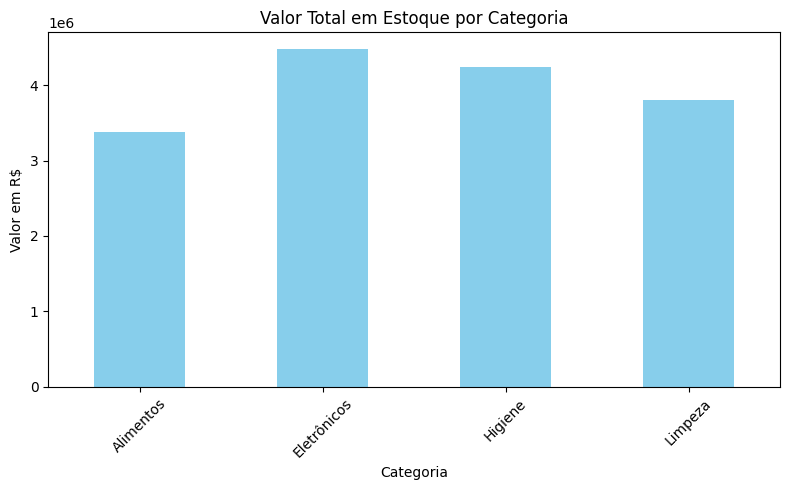

In [13]:
# Agrupe os dados por Categoria e calcule a soma total de Valor_Estoque de cada categoria
agrupamento3 = df.groupby('Categoria')['Valor_Estoque'].sum().reset_index()
print(agrupamento3, '\n')

# Ordene do maior para o menor.
print(agrupamento3.sort_values(by='Valor_Estoque', ascending=False))

# Pode ser salvo como CSV ou exibido como gráfico.
# Abordagem usando Gráfico
agrupamento3.plot(
    kind='bar',
    x='Categoria',
    y='Valor_Estoque',
    legend=False,
    color='skyblue',
    figsize=(8, 5)
)

plt.title('Valor Total em Estoque por Categoria')
plt.ylabel('Valor em R$')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7.Classificar produtos em faixas de estoque

In [20]:
# Adicione uma nova coluna chamada Nivel_Estoque com base na Quantidade:
# Baixo: Quantidade < 10
# Médio: entre 10 e 50
# Alto: > 50
df["Nivel_Estoque"] = df["Quantidade"].apply(lambda x: "Baixo" if x < 10 else ("Médio" if x <= 50 else "Alto"))

# Faça uma contagem por nível.
print(df.groupby("Nivel_Estoque")["Nivel_Estoque"].count()) # Aqui eu repito [Nivel_Estoque] porque sem ele ele mostra todas as colunas com a contagem

Nivel_Estoque
Alto     462
Baixo     18
Médio    120
Name: Nivel_Estoque, dtype: int64


### 8. Análise temporal

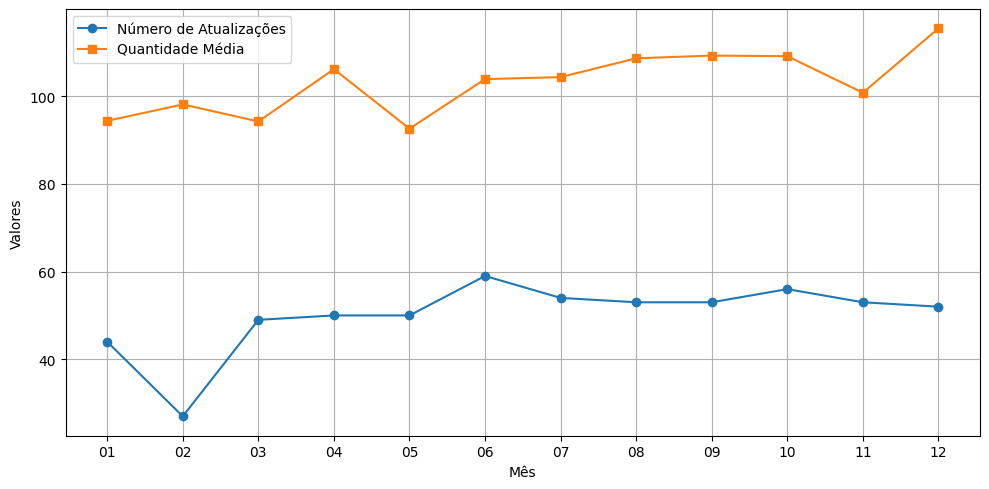

In [56]:
# Converta a coluna Data_Atualizacao para o tipo datetime.
df['Data_Atualizacao'] = pd.to_datetime(df['Data_Atualizacao'])
df['Mes'] = df['Data_Atualizacao'].dt.strftime('%m')  # Criando uma coluna separada pra mês para fazer o agrupamento

# Agrupe por mês (ou trimestre) e calcule:
  # Número de atualizações de estoque
  # Quantidade média dos produtos atualizados
agrupamento_por_mes = df.groupby('Mes').agg({
    'Produto': 'count',
    'Quantidade': 'mean'
}).rename(columns={
    'Produto': 'Num_Atualizacoes',
    'Quantidade': 'Quantidade_Media'
}).reset_index() # Sem o reset index a Coluna Mes não existe

# Gere uma visualização de linha temporal com esses dados.
plt.figure(figsize=(10, 5))
plt.plot(agrupamento_por_mes['Mes'], agrupamento_por_mes['Num_Atualizacoes'], marker='o', label='Número de Atualizações')
plt.plot(agrupamento_por_mes['Mes'], agrupamento_por_mes['Quantidade_Media'], marker='s', label='Quantidade Média')

plt.xlabel('Mês')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()